In [1]:
import pandas as pd
import numpy as np


In [2]:
df_pathway_att = pd.read_csv('../../data/GEP_CellBlind_LUNG_pathway_attention.csv')

df_pathway_att = df_pathway_att[df_pathway_att['cell_line'].isin(['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228'])]
# 重置索引
df_pathway_att = df_pathway_att.reset_index(drop=True)
print(df_pathway_att.shape)
df_pathway_att.head()

(2705, 622)


,drug,cell_line,OncotreeCode,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
0,5-Fluorouracil,HCC827,LUAD,0.001369,0.001426,0.001540,0.002264,0.001739,0.001743,0.001756,...,0.001509,0.001329,0.001365,0.001443,0.001413,0.001735,0.002677,0.001404,0.002237,0.001536
1,5-azacytidine,HCC827,LUAD,0.001556,0.001327,0.001549,0.002153,0.001751,0.001593,0.001424,...,0.001550,0.001314,0.001348,0.001411,0.001411,0.001747,0.002680,0.001549,0.002575,0.001526
2,A-366,HCC827,LUAD,0.001391,0.001622,0.001523,0.001685,0.001708,0.001727,0.001567,...,0.001524,0.001405,0.001509,0.001394,0.001567,0.001561,0.002652,0.001285,0.002561,0.001581
3,ABT737,HCC827,LUAD,0.001371,0.001472,0.001551,0.001253,0.001746,0.001757,0.001596,...,0.001371,0.001404,0.001544,0.001479,0.001595,0.001588,0.002382,0.001216,0.002352,0.001505
4,AGI-5198,HCC827,LUAD,0.001361,0.001451,0.001533,0.001655,0.001740,0.001577,0.001578,...,0.001534,0.001364,0.001502,0.001404,0.001403,0.001734,0.002483,0.001392,0.002451,0.001517


In [3]:
# 将df_LUNG根据cell_line分组，再取每组drug列的交集
df_pathway_att_drug = df_pathway_att.groupby('cell_line')['drug'].apply(set).reset_index()
# 将df_LUNG_drug中的drug取交集
drugs = set.intersection(*df_pathway_att_drug['drug'])
print(len(drugs))
# 取df_LUNG中drug中在drugs中的数据
df_pathway_att = df_pathway_att[df_pathway_att['drug'].isin(drugs)]
# 去掉drug = ABT737,AZD5582,Dactinomycin,Docetaxel,GSK1904529A,Navitoclax,Paclitaxel,Sabutoclax,Venetoclax
df_pathway_att = df_pathway_att[~df_pathway_att['drug'].isin(['ABT737','AZD5582','Dactinomycin','Docetaxel','GSK1904529A','Navitoclax','Paclitaxel','Sabutoclax','Venetoclax'])]
# 重置索引
df_pathway_att = df_pathway_att.reset_index(drop=True)
print(df_pathway_att.shape)

144
(1755, 622)


In [4]:
df_grug_smiles = pd.read_csv('../../data/CCLE-GDSC-SMILES.csv')
df_grug_smiles.head()

,CID,SMILES,DRUG_NAME
0,24360,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,Camptothecin
1,13342,CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...,Vinblastine
2,5702198,N.N.Cl[Pt]Cl,Cisplatin
3,6253,C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)O,Cytarabine
4,148124,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,Docetaxel


In [5]:
# 筛选出drugs中在df_grug_smiles中的数据
df_grug_smiles_origin = df_grug_smiles[df_grug_smiles['DRUG_NAME'].isin(drugs)]
# 从df_grug_smiles_left筛选出：['ABT737','AZD5582','Dactinomycin','Docetaxel','GSK1904529A','Navitoclax','Paclitaxel','Sabutoclax','Venetoclax']，作为df_grug_smiles_right,并从df_grug_smiles_left中去掉
df_grug_smiles_right = df_grug_smiles_origin[df_grug_smiles_origin['DRUG_NAME'].isin(['ABT737','AZD5582','Dactinomycin','Docetaxel','GSK1904529A','Navitoclax','Paclitaxel','Sabutoclax','Venetoclax'])]
df_grug_smiles_left = df_grug_smiles_origin[~df_grug_smiles_origin['DRUG_NAME'].isin(['ABT737','AZD5582','Dactinomycin','Docetaxel','GSK1904529A','Navitoclax','Paclitaxel','Sabutoclax','Venetoclax'])]
# 重置索引
df_grug_smiles_left = df_grug_smiles_left.reset_index(drop=True)
df_grug_smiles_right = df_grug_smiles_right.reset_index(drop=True)
print(df_grug_smiles_left.shape)
print(df_grug_smiles_right.shape)

(135, 3)
(9, 3)


In [6]:
from pytoda.smiles import SMILESTokenizer
smiles_language_filepath = '../../../data/smiles_language/tokenizer_customized'
# Load SMILES language
smiles_language = SMILESTokenizer.from_pretrained(smiles_language_filepath)
smiles_language.set_encoding_transforms(
    add_start_and_stop=True,
    padding=True,
    padding_length=256,
    # padding_length=params.get("smiles_padding_length", None),
)
smiles_language.set_smiles_transforms(
    augment=False,
    canonical=False,
    kekulize=False,
    all_bonds_explicit=False,
    all_hs_explicit=False,
    remove_bonddir=False,
    remove_chirality=False,
    selfies=False,
    sanitize=False,
)
smiles_language.add_dataset(df_grug_smiles_origin['SMILES'])

In [7]:
# 批量将SMILES转换成token，smiles_language.smiles_to_token_indexes(df_grug_smiles_left['SMILES'][0])，这个token是Tensor，需要转换成numpy
df_grug_smiles_left['SMILES_token'] = df_grug_smiles_left['SMILES'].apply(lambda x: smiles_language.smiles_to_token_indexes(x).numpy().tolist())
df_grug_smiles_right['SMILES_token'] = df_grug_smiles_right['SMILES'].apply(lambda x: smiles_language.smiles_to_token_indexes(x).numpy().tolist())

In [8]:
print(df_grug_smiles_left['SMILES_token'][0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 38, 38, 38, 6, 4, 38, 7, 37, 38, 4, 38, 35, 38, 6, 37, 35, 5, 38, 4, 37, 35, 5, 36, 8, 38, 38, 9, 37, 38, 38, 10, 37, 38, 38, 37, 38, 38, 37, 38, 10, 36, 37, 38, 9, 38, 8, 37, 38, 7, 5, 35, 3]


In [9]:
# 计算df_grug_smiles_left中的SMILES的长度
df_grug_smiles_left['SMILES_len'] = df_grug_smiles_left['SMILES'].apply(lambda x: len(x))
# 计算df_grug_smiles_right中的SMILES的长度
df_grug_smiles_right['SMILES_len'] = df_grug_smiles_right['SMILES'].apply(lambda x: len(x))


In [10]:
# 计算平均长度
print('左边聚类药物平均smiles长度：',df_grug_smiles_left['SMILES_len'].mean())
print('右边聚类药物平均smiles长度：',df_grug_smiles_right['SMILES_len'].mean())

左边聚类药物平均smiles长度： 58.42962962962963
右边聚类药物平均smiles长度： 128.55555555555554


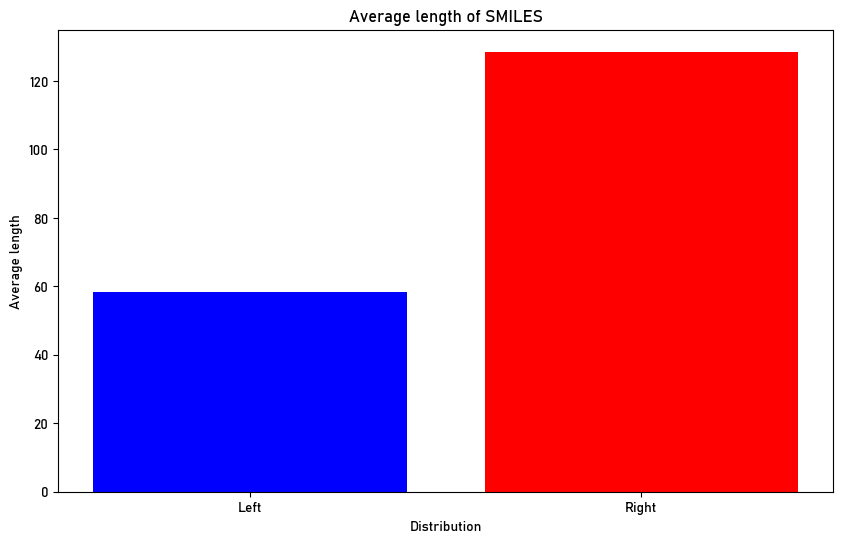

In [11]:
# 画一个柱状图，比较左右两边的smiles长度
import matplotlib.pyplot as plt
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 6))
plt.bar(['Left', 'Right'], [df_grug_smiles_left['SMILES_len'].mean(), df_grug_smiles_right['SMILES_len'].mean()], color=['b','r'])
plt.title('Average length of SMILES')
plt.xlabel('Distribution')
plt.ylabel('Average length')
plt.savefig('LUNG_pathway_attention_SMILES_length.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd

def calculate_descriptors(smiles_list):
    desc_list = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        desc = [
            Descriptors.MolWt(mol), # 分子量;体积
            Descriptors.TPSA(mol), # 极性表面积
            Descriptors.MolLogP(mol),# 脂溶性
            Descriptors.NumHDonors(mol),#氢键供体数
            Descriptors.NumHAcceptors(mol),#氢键受体数
            Descriptors.NumRotatableBonds(mol), # 可旋转键数
            Descriptors.NOCount(mol),#氮氧原子数
            Descriptors.NumAromaticRings(mol),#芳香环数
            Descriptors.NumAliphaticRings(mol),#脂环数
            Descriptors.NumSaturatedRings(mol),#饱和环数
        ]
        desc_list.append(desc)
    return desc_list
# MolWt：分子量，影响药物分子的药效性和药动性，一般来说，分子量越小，越容易通过细胞膜，越容易到达作用靶点，也越容易被肾脏排泄。一般认为，药物分子的分子量应该在100-500之间。
# MolLogP：LogP，反映药物分子的亲疏水性，影响药物分子的药效性和药动性，一般来说，LogP越大，越容易通过细胞膜，越容易进入脂溶性组织，也越容易被肝脏代谢。一般认为，药物分子的LogP应该在-0.4-5.6之间。
# TPSA：极性表面积，反映药物分子的极性，影响药物分子的药效性和药动性，一般来说，TPSA越小，越容易通过细胞膜，越容易进入中枢神经系统，也越容易被肾脏排泄。一般认为，药物分子的TPSA应该在20-140之间。
# NumHDonors：氢键供体的个数，反映药物分子的氢键能力，影响药物分子的药效性和药动性，一般来说，氢键供体越多，越容易与靶点形成氢键，增强亲合力，也越容易与水分子形成氢键，增加溶解度。一般认为，药物分子的氢键供体个数应该在0-5之间。
# NumHAcceptors：氢键受体的个数，反映药物分子的氢键能力，影响药物分子的药效性和药动性，一般来说，氢键受体越多，越容易与靶点形成氢键，增强亲合力，也越容易与水分子形成氢键，增加溶解度。一般认为，药物分子的氢键受体个数应该在0-10之间。

In [13]:
# 9种药物的SMILES
smiles_right_list = df_grug_smiles_right['SMILES'].to_list()
# 计算9种药物的描述符
right_smiles_info = calculate_descriptors(smiles_right_list)
#转为DataFrame  
right_smiles_info = pd.DataFrame(right_smiles_info, columns=['MolWt', 'TPSA', 'MolLogP', 'NumHDonors', 'NumHAcceptors', 'NumRotatableBonds', 'NOCount', 'NumAromaticRings', 'NumAliphaticRings', 'NumSaturatedRings'])
# 将df_grug_smiles_right的DRUG_NAME列插入到right_smiles_info第一列
right_smiles_info.insert(0, 'DRUG_NAME', df_grug_smiles_right['DRUG_NAME'])
right_smiles_info.head()

,DRUG_NAME,MolWt,TPSA,MolLogP,NumHDonors,NumHAcceptors,NumRotatableBonds,NOCount,NumAromaticRings,NumAliphaticRings,NumSaturatedRings
0,Docetaxel,807.890,224.45,3.2596,5,14,8,15,2,4,3
1,Navitoclax,974.634,128.36,8.8332,2,11,16,11,4,3,2
2,Paclitaxel,853.918,221.29,3.7357,4,14,10,15,3,4,3
3,GSK1904529A,851.981,146.53,6.8580,2,12,12,14,6,2,2
4,AZD5582,1015.310,199.54,3.9188,6,10,18,16,2,6,4


In [14]:
# 其他药物的SMILES
smiles_left_list = df_grug_smiles_left['SMILES'].to_list()
# 计算其他药物的描述符
left_smiles_info = calculate_descriptors(smiles_left_list)
#转为DataFrame
left_smiles_info = pd.DataFrame(left_smiles_info, columns=['MolWt', 'TPSA', 'MolLogP', 'NumHDonors', 'NumHAcceptors', 'NumRotatableBonds', 'NOCount', 'NumAromaticRings', 'NumAliphaticRings', 'NumSaturatedRings'])
# 将df_grug_smiles_left的DRUG_NAME列插入到left_smiles_info第一列
left_smiles_info.insert(0, 'DRUG_NAME', df_grug_smiles_left['DRUG_NAME'])
left_smiles_info.head()

,DRUG_NAME,MolWt,TPSA,MolLogP,NumHDonors,NumHAcceptors,NumRotatableBonds,NOCount,NumAromaticRings,NumAliphaticRings,NumSaturatedRings
0,Camptothecin,348.358,81.42,2.07960,1,6,1,6,3,2,0
1,Gefitinib,446.910,68.74,4.27560,1,7,8,7,3,1,1
2,Vorinostat,264.325,78.43,2.47110,3,3,8,5,1,0,0
3,Nilotinib,529.526,97.62,6.35584,2,7,6,8,5,0,0
4,Olaparib,434.471,86.37,2.34740,1,4,4,7,3,2,2


In [15]:
# 将left_smiles_info与right_smiles_info合并，并加入新的属性列：left_or_right
left_smiles_info['Distribution'] = 'Left'
right_smiles_info['Distribution'] = 'Right'
smiles_info = pd.concat([left_smiles_info, right_smiles_info])
print(smiles_info.shape)
smiles_info.head()

(144, 12)


,DRUG_NAME,MolWt,TPSA,MolLogP,NumHDonors,NumHAcceptors,NumRotatableBonds,NOCount,NumAromaticRings,NumAliphaticRings,NumSaturatedRings,Distribution
0,Camptothecin,348.358,81.42,2.07960,1,6,1,6,3,2,0,Left
1,Gefitinib,446.910,68.74,4.27560,1,7,8,7,3,1,1,Left
2,Vorinostat,264.325,78.43,2.47110,3,3,8,5,1,0,0,Left
3,Nilotinib,529.526,97.62,6.35584,2,7,6,8,5,0,0,Left
4,Olaparib,434.471,86.37,2.34740,1,4,4,7,3,2,2,Left


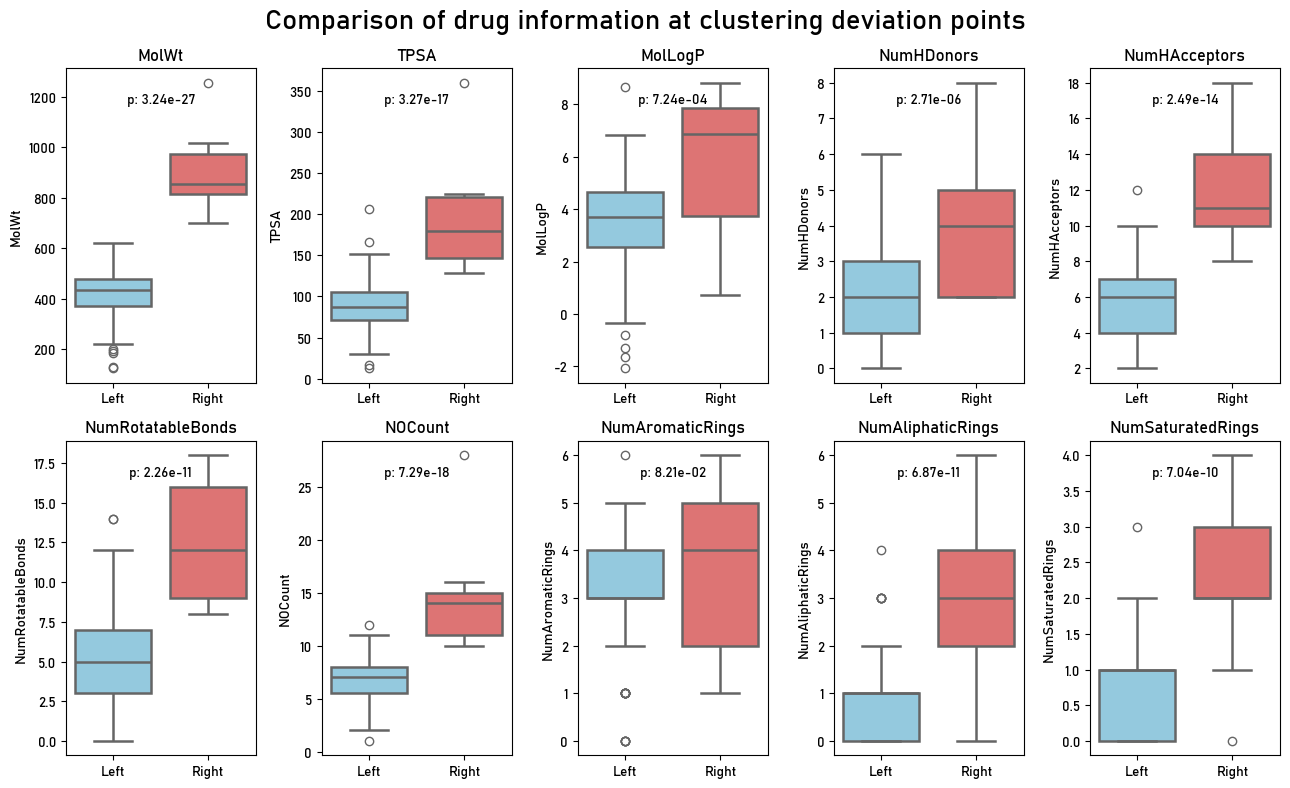

In [27]:
from scipy.stats import ttest_ind
# 画图：箱线图，smiles_info，每个属性画一张箱线图，hue=left_or_right
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 8))
# 设置颜色
# ['#984EA3','#FF7F00','#E41A1C','#4DAF4A','#377EB8']
# 设置颜色方案
palette = {'Left':'#87CEEB', 
           'Right':'#EE6363'}
# MolWt
plt.subplot(2, 5, 1)
sns.boxplot(x='Distribution', y='MolWt', data=smiles_info,hue='Distribution', palette=palette,linewidth=1.8)
plt.title('MolWt')
plt.xlabel('')
# Calculate correlation coefficient
_, p_val = ttest_ind(smiles_info[smiles_info['Distribution'] == 'Left']['MolWt'], smiles_info[smiles_info['Distribution'] == 'Right']['MolWt'])
# Add text to the plot
plt.text(0.5, 0.9, f'p: {p_val:.2e}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
# TPSA
plt.subplot(2, 5, 2)
sns.boxplot(x='Distribution', y='TPSA', data=smiles_info,hue='Distribution', palette=palette,linewidth=1.8)
plt.title('TPSA')
plt.xlabel('')
# Calculate correlation coefficient
_, p_val = ttest_ind(smiles_info[smiles_info['Distribution'] == 'Left']['TPSA'], smiles_info[smiles_info['Distribution'] == 'Right']['TPSA'])
# Add text to the plot
plt.text(0.5, 0.9, f'p: {p_val:.2e}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
# MolLogP
plt.subplot(2, 5, 3)
sns.boxplot(x='Distribution', y='MolLogP', data=smiles_info,hue='Distribution', palette=palette,linewidth=1.8)
plt.title('MolLogP')
plt.xlabel('')
# Calculate correlation coefficient
_, p_val = ttest_ind(smiles_info[smiles_info['Distribution'] == 'Left']['MolLogP'], smiles_info[smiles_info['Distribution'] == 'Right']['MolLogP'])
# Add text to the plot
plt.text(0.5, 0.9, f'p: {p_val:.2e}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
# NumHDonors
plt.subplot(2, 5, 4)
sns.boxplot(x='Distribution', y='NumHDonors', data=smiles_info,hue='Distribution', palette=palette,linewidth=1.8)
plt.title('NumHDonors')
plt.xlabel('')
# Calculate correlation coefficient
_, p_val = ttest_ind(smiles_info[smiles_info['Distribution'] == 'Left']['NumHDonors'], smiles_info[smiles_info['Distribution'] == 'Right']['NumHDonors'])
# Add text to the plot
plt.text(0.5, 0.9, f'p: {p_val:.2e}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
# NumHAcceptors
plt.subplot(2, 5, 5)
sns.boxplot(x='Distribution', y='NumHAcceptors', data=smiles_info,hue='Distribution', palette=palette,linewidth=1.8)
plt.title('NumHAcceptors')
plt.xlabel('')
# Calculate correlation coefficient
_, p_val = ttest_ind(smiles_info[smiles_info['Distribution'] == 'Left']['NumHAcceptors'], smiles_info[smiles_info['Distribution'] == 'Right']['NumHAcceptors'])
# Add text to the plot
plt.text(0.5, 0.9, f'p: {p_val:.2e}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
# NumRotatableBonds
plt.subplot(2, 5, 6)
sns.boxplot(x='Distribution', y='NumRotatableBonds', data=smiles_info,hue='Distribution', palette=palette,linewidth=1.8)
plt.title('NumRotatableBonds')
plt.xlabel('')
# Calculate correlation coefficient
_, p_val = ttest_ind(smiles_info[smiles_info['Distribution'] == 'Left']['NumRotatableBonds'], smiles_info[smiles_info['Distribution'] == 'Right']['NumRotatableBonds'])
# Add text to the plot
plt.text(0.5, 0.9, f'p: {p_val:.2e}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
# NOCount
plt.subplot(2, 5, 7)
sns.boxplot(x='Distribution', y='NOCount', data=smiles_info,hue='Distribution', palette=palette,linewidth=1.8)
plt.title('NOCount')
plt.xlabel('')
# Calculate correlation coefficient
_, p_val = ttest_ind(smiles_info[smiles_info['Distribution'] == 'Left']['NOCount'], smiles_info[smiles_info['Distribution'] == 'Right']['NOCount'])
# Add text to the plot
plt.text(0.5, 0.9, f'p: {p_val:.2e}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
# NumAromaticRings
plt.subplot(2, 5, 8)
sns.boxplot(x='Distribution', y='NumAromaticRings', data=smiles_info,hue='Distribution', palette=palette,linewidth=1.8)
plt.title('NumAromaticRings')
plt.xlabel('')
# Calculate correlation coefficient
_, p_val = ttest_ind(smiles_info[smiles_info['Distribution'] == 'Left']['NumAromaticRings'], smiles_info[smiles_info['Distribution'] == 'Right']['NumAromaticRings'])
# Add text to the plot
plt.text(0.5, 0.9, f'p: {p_val:.2e}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
# NumAliphaticRings
plt.subplot(2, 5, 9)
sns.boxplot(x='Distribution', y='NumAliphaticRings', data=smiles_info,hue='Distribution', palette=palette,linewidth=1.8)
plt.title('NumAliphaticRings')
plt.xlabel('')
# Calculate correlation coefficient
_, p_val = ttest_ind(smiles_info[smiles_info['Distribution'] == 'Left']['NumAliphaticRings'], smiles_info[smiles_info['Distribution'] == 'Right']['NumAliphaticRings'])
# Add text to the plot
plt.text(0.5, 0.9, f'p: {p_val:.2e}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
# NumSaturatedRings
plt.subplot(2, 5, 10)
sns.boxplot(x='Distribution', y='NumSaturatedRings', data=smiles_info,hue='Distribution', palette=palette,linewidth=1.8)
plt.title('NumSaturatedRings')
plt.xlabel('')
# Calculate correlation coefficient
_, p_val = ttest_ind(smiles_info[smiles_info['Distribution'] == 'Left']['NumSaturatedRings'], smiles_info[smiles_info['Distribution'] == 'Right']['NumSaturatedRings'])
# Add text to the plot
plt.text(0.5, 0.9, f'p: {p_val:.2e}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# 在plt.figure(figsize=(13, 8)) 整个画布上添加标题，添加X轴标题
plt.suptitle('Comparison of drug information at clustering deviation points', fontsize=20)

# 在plt.figure(figsize=(13, 8)) 整个画布添加X轴Label
# plt.xlabel('Distribution', fontsize=15)


plt.tight_layout()
plt.savefig('LUNG_pathway_attention_smiles_info.png', dpi=300, bbox_inches='tight')
plt.show()


In [21]:
# 取df_pathway_att前三列数据
df_pathway_att_OncotreeCode = df_pathway_att.iloc[:, :3]
# 去掉第一列数据
# df_pathway_att_OncotreeCode = df_pathway_att_OncotreeCode.drop(['drug'], axis=1)
# 去重
df_pathway_att_OncotreeCode = df_pathway_att_OncotreeCode.drop_duplicates()
# 重置索引
df_pathway_att_OncotreeCode = df_pathway_att_OncotreeCode.reset_index(drop=True)
print(df_pathway_att_OncotreeCode.shape)
df_pathway_att_OncotreeCode.head()

(1755, 3)


,drug,cell_line,OncotreeCode
0,5-Fluorouracil,HCC827,LUAD
1,AGI-5198,HCC827,LUAD
2,AGI-6780,HCC827,LUAD
3,AGK2,HCC827,LUAD
4,AZ960,HCC827,LUAD


In [22]:
# 对df_pathway_att从第四列数据开始进行PCA降维，降维成2维数据
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_pathway_att.iloc[:, 3:])
df_pathway_att_pca = pca.transform(df_pathway_att.iloc[:, 3:])
df_pathway_att_pca.shape

(1755, 2)

In [23]:
# 将降维后的数据转换成dataframe
df_pathway_att_pca = pd.DataFrame(df_pathway_att_pca)
df_pathway_att_pca.columns = ['pca_1', 'pca_2']
df_pathway_att_pca.insert(0, 'cell_line', df_pathway_att['cell_line'])
df_pathway_att_pca.insert(1, 'OncotreeCode', df_pathway_att['OncotreeCode'])
# 将pca_1>0.002的数据标注出来，方便后面的数据分析
df_pathway_att_pca['pca_1>0.002'] = df_pathway_att_pca['pca_1'].apply(lambda x: 1 if x>0.002 else 0)
print(df_pathway_att_pca.shape)
df_pathway_att_pca.head()

(1755, 5)


,cell_line,OncotreeCode,pca_1,pca_2,pca_1>0.002
0,HCC827,LUAD,0.000089,-0.001395,0
1,HCC827,LUAD,-0.001012,0.000205,0
2,HCC827,LUAD,-0.001130,0.000511,0
3,HCC827,LUAD,-0.000893,-0.000370,0
4,HCC827,LUAD,-0.000585,-0.001102,0


In [17]:
# 将df_pathway_att_pca与df_pathway_att_OncotreeCode合并,按照index
# df_pathway_att_pca = pd.concat([df_pathway_att_pca, df_pathway_att_OncotreeCode], axis=1)
# print(df_pathway_att_pca.shape)
# df_pathway_att_pca.head()

In [24]:
# 设置颜色
# ['#984EA3','#FF7F00','#E41A1C','#4DAF4A','#377EB8']
# 设置颜色方案
palette = {'LUAD':'#984EA3', 
           'LCLC':'#FF7F00', 
           'NSCLC':'#4DAF4A',
           'LUSC':'#377EB8',
           'SCLC':'#E41A1C'}
# palette = {'LUAD':'#b9f2f0', 
#            'LCLC':'#d0bbff', 
#            'NSCLC':'#ff9f9b',
#            'LUSC':'#a6d854',
#            'SCLC':'#66c2a5'}
# 将df_pathway_att_pca的OncotreeCode列的值替换成颜色
df_pathway_att_pca['OncotreeCode'] = df_pathway_att_pca['OncotreeCode'].map(palette)

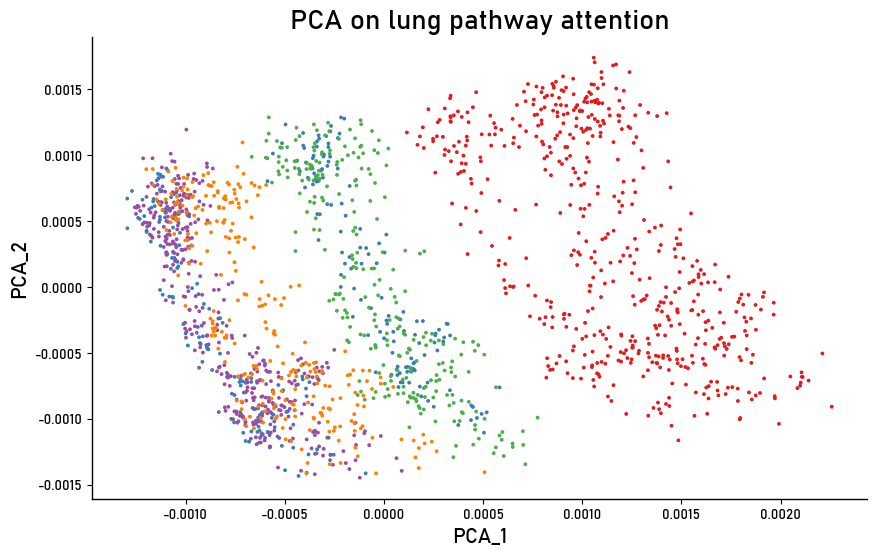

In [26]:
# 画出散点图，按照OncotreeCode进行着色
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 6))
plt.scatter(x=df_pathway_att_pca['pca_1'], y=df_pathway_att_pca['pca_2'], c=df_pathway_att_pca['OncotreeCode'], s=3)
# Get the current axes, creating one if necessary.
ax = plt.gca()
# Set the spines (the box) visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['bottom'].set_linewidth(2)  # X轴线宽
ax.spines['left'].set_linewidth(1)  # Y轴线宽
ax.spines['bottom'].set_linewidth(1)

# title
plt.title('PCA on lung pathway attention', fontsize=20)

# X轴：PCA1
plt.xlabel('PCA_1', fontsize=15)
# Y轴：PCA2
plt.ylabel('PCA_2', fontsize=15)

plt.savefig('LUNG_pathway_attention_PCA.png', dpi=300, bbox_inches='tight')

plt.show()

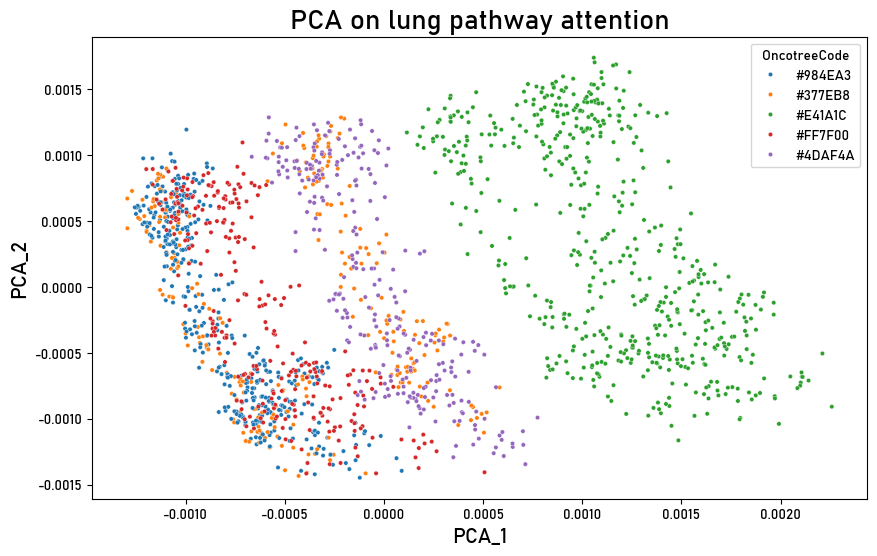

In [27]:
# 使用seaborn画图
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='OncotreeCode', data=df_pathway_att_pca, s=10)
# title
plt.title('PCA on lung pathway attention', fontsize=20)

# X轴：PCA1
plt.xlabel('PCA_1', fontsize=15)
# Y轴：PCA2
plt.ylabel('PCA_2', fontsize=15)

# plt.savefig('LUNG_pathway_attention_PCA_seaborn.png', dpi=300, bbox_inches='tight')

plt.show()